In [2]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Create a dataframe from the data
df = pd.read_csv('Mall_Customers.csv')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


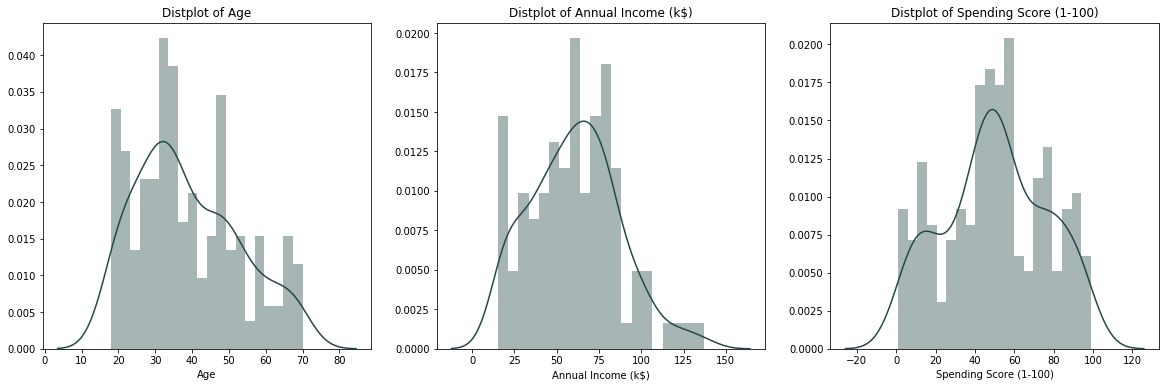

In [3]:
# Check the distribution of numerical variables from the data
fig, ax = plt.subplots(1,3,figsize=(20,6))
n = 0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    sns.distplot(df[x],bins=20,color='#244747',ax=ax[n])
    ax[n].set_title('Distplot of {}'.format(x))
    n+=1

In [4]:
# mean centering and standardizing variables
# I omit the discrete variable gender for the k-means clustering
variables = ['Age','Annual Income (k$)','Spending Score (1-100)']
cols = df[variables]
scaler = StandardScaler().fit(cols)
n_data = scaler.transform(cols)
sca_data = pd.DataFrame(n_data, columns = variables)

Text(0,0.5,'Inertia')

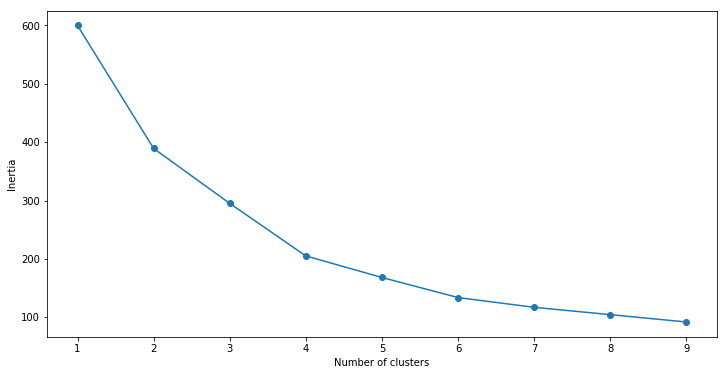

In [9]:
# Clustering SSEs
SSE = np.zeros(9)
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(sca_data)
    SSE[cluster-1] = kmeans.inertia_
    
# plot clusters and their respective SSEs

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')



In [5]:
# Choose the first 5 clusters that form the elbow and measure the silhoutte scores
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(sca_data)
# The silhouette score of this model
score = silhouette_score(sca_data, kmeans.labels_, metric='euclidean')
print(score) # The score is higher with the omission of gender variable

0.41664341513732767


In [23]:
# Perform K-means algorithm on the data and visualize them 
model = KMeans(n_clusters=5)
model.fit(sca_data)
labels = model.labels_
centroids = model.cluster_centers_

char_labels = [str(i) for i in labels]
sca_data['Label'] = char_labels
sca_data.sort_values(by='Label',inplace=True)
fig = px.scatter_3d(sca_data,x='Age',
                    y='Annual Income (k$)',
                    z='Spending Score (1-100)',
                    color='Label')
fig.show()

In [24]:
# Building consumer profiles based on the classification
categories = ['Age', 'Annual Income', 'Spending Score']

tp0 = sca_data[sca_data['Label']=='0'].drop('Label',axis=1)
tp1 = sca_data[sca_data['Label']=='1'].drop('Label',axis=1)
tp2 = sca_data[sca_data['Label']=='2'].drop('Label',axis=1)
tp3 = sca_data[n['Label']=='3'].drop('Label',axis=1)
tp4 = new_data[new_data['Label']=='4'].drop('Label',axis=1)
tp5 = new_data[new_data['Label']=='5'].drop('Label',axis=1)

# Visualize the consumer profiles

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=tp0.mean().values,
    theta=categories,
    fill='toself',
    name='Type 0'
))

fig.add_trace(go.Scatterpolar(
    r=tp1.mean().values,
    theta=categories,
    fill='toself',
    name='Type 1'
))

fig.add_trace(go.Scatterpolar(
    r=tp2.mean().values,
    theta=categories,
    fill='toself',
    name='Type 2'
))

fig.add_trace(go.Scatterpolar(
    r=tp3.mean().values,
    theta=categories,
    fill='toself',
    name='Type 3'
))

fig.add_trace(go.Scatterpolar(
    r=tp4.mean().values,
    theta=categories,
    fill='toself',
    name='Type 4'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=True,
)